# Star Wars 
Before *Star Wars: The Force Awakens* came out FiveThirtyEight collected data on stars fans using an online survey tool.  We will be looking into this data to find if there are any interesting trends in how people enjoy *Star Wars*.  We will read their star_wars.csv file into pandas.  The was taken from [fivethirtyeight's github repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) The following is some definitions of columns in this dataset.  



***RespondentID***: An anoymized ID for the respondent (person taking the survey)

***Gender***: The respondent's gender

***Age*** The respondent's age

***Household Income***: The repondent's income

***Education***: The repondent's education level

***Location (Census Region)***: The respondent's location

***Have you seen any of the 6 films in the Star Wars franchise?*** : Has a ***Yes*** or ***No*** response

***Do you consider yourself to be a fan of the Star Wars film franchise?***: Has a ***Yes*** or ***No*** response

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
#Removes the rows with a null RespondentID
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [4]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
#Changes the Have you seen any of the 6 films in the Star Wars franchise? column into boolean
map_dict = {"Yes": True, "No": False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(map_dict)
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
#Changes "Do you consider yourself to be a fan of the Star Wars film franchise?" to boolean
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(map_dict)

In [8]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

# Movies Seen
The six columns we will work on next represent a single question that respondent's checked off in a series of box responses.  

***Which of the following Star Wars films have you seen? Please select all that apply.***: Where or not the respondent saw Star Wars: Episode I The Phantom Menace

***Unnamed: 4 ***: Whether or not the respondent saw Star Wars: Episode II Attack of the clones 

***Unnamed: 5***: Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith

***Unnamed: 6***: Whether or not the respondent saw Star Wars: Episode IV A New Hope

***Unnamed: 7***: Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back

***Unnamed: 8***: Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi

For these columns if the value for the cell is the name of the movie then the respondent saw the movie.  If the Value is NaN the respondent either didn't answer or didn't see the movie.  We will convert these columns to boolean so if the respondent saw the movie the value will be True and the value will be False otherwise.  We will then change the column names to better reflect what they represent.  

In [9]:
print(star_wars["Which of the following Star Wars films have you seen? Please select all that apply."].value_counts(dropna = False))
#Changes the column to boolean value
map_dict = {"Star Wars: Episode I  The Phantom Menace": True, np.NaN: False}
star_wars["Which of the following Star Wars films have you seen? Please select all that apply."] = star_wars["Which of the following Star Wars films have you seen? Please select all that apply."].map(map_dict)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


In [10]:
print(star_wars["Which of the following Star Wars films have you seen? Please select all that apply."].value_counts(dropna = False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


In [11]:
print(star_wars["Unnamed: 4"].value_counts(dropna = False))
#Changes the column to boolean value
map_dict = {"Star Wars: Episode II  Attack of the Clones": True, np.NaN: False}
star_wars["Unnamed: 4"] = star_wars["Unnamed: 4"].map(map_dict)

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64


In [12]:
print(star_wars["Unnamed: 4"].value_counts(dropna = False))

False    615
True     571
Name: Unnamed: 4, dtype: int64


In [13]:
print(star_wars["Unnamed: 5"].value_counts(dropna = False))
#changes the column to boolean
map_dict = {"Star Wars: Episode III  Revenge of the Sith": True, np.NaN: False }
star_wars["Unnamed: 5"] = star_wars["Unnamed: 5"].map(map_dict)

NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64


In [14]:
print(star_wars["Unnamed: 5"].value_counts(dropna = False))

False    636
True     550
Name: Unnamed: 5, dtype: int64


In [15]:
print(star_wars["Unnamed: 6"].value_counts(dropna = False))
#changes the column to boolean
map_dict = {"Star Wars: Episode IV  A New Hope": True, np.NaN: False}
star_wars["Unnamed: 6"] = star_wars["Unnamed: 6"].map(map_dict)

Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64


In [16]:
print(star_wars["Unnamed: 6"].value_counts(dropna = False))

True     607
False    579
Name: Unnamed: 6, dtype: int64


In [17]:
print(star_wars["Unnamed: 7"].value_counts(dropna = False))
#changes the column to boolean
map_dict = {"Star Wars: Episode V The Empire Strikes Back": True, np.NaN: False}
star_wars["Unnamed: 7"] = star_wars["Unnamed: 7"].map(map_dict)

Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64


In [18]:
print(star_wars["Unnamed: 7"].value_counts(dropna = False))

True     758
False    428
Name: Unnamed: 7, dtype: int64


In [19]:
print(star_wars["Unnamed: 8"].value_counts(dropna = False))
#changes the column to boolean
map_dict = {"Star Wars: Episode VI Return of the Jedi": True, np.NaN: False}
star_wars["Unnamed: 8"] = star_wars["Unnamed: 8"].map(map_dict)

Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64


In [20]:
print(star_wars["Unnamed: 8"].value_counts(dropna = False))

True     738
False    448
Name: Unnamed: 8, dtype: int64


In [21]:
#Rennames the columns to better represent the data they include
print(star_wars.columns[3:9])
rename_dict = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
               "Unnamed: 4": "seen_2",
               "Unnamed: 5": "seen_3",
               "Unnamed: 6": "seen_4",
               "Unnamed: 7": "seen_5",
               "Unnamed: 8": "seen_6"
               }
star_wars.rename(rename_dict, inplace = True, axis = 1)

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [22]:
print(star_wars.columns[3:9])

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


# Movie Rankings
The next six columns we will work with have the respondents rank the star wars movies with a number 1 to 6 with 1 being their most favorite of the series and 6 being the least favorite.  These columns contain the values 1-6 as well as NaN (not a number).  We will convert these columns from string to float.  The name of the columns and their definitions are the following:

***Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.***: How much the respondent liked Star Wars: Episode I The Phantom Menace

***Unnamed: 10***: How much the respondent liked Star Wars: Episode II Attack of the Clones

***Unnamed: 11***: How much the respondent liked Star Wars: Episode III Revenge of the Sith

***Unnamed: 12***: How much the respondent liked Star Wars: Episode IV A New Hope

***Unnamed: 13***: How much the respondent liked Star Wars: Episode V The Empire Strikes Back

***Unnamed: 14***: How much the respondent liked Star Wars: Episode VI Return of the Jedi

As before the column names do not reflect the data they represent so we will renname these columns with a more appropriate name.  


In [23]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [24]:
#Rennames the columns
rename_dict = {
                "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
                "Unnamed: 10": "ranking_2",
                "Unnamed: 11": "ranking_3",
                "Unnamed: 12": "ranking_4",
                "Unnamed: 13": "ranking_5",
                "Unnamed: 14": "ranking_6"
                }
star_wars.rename(rename_dict, inplace = True, axis = 1)

In [25]:
print(star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


# Movie Ranking Analysis

In [26]:
#The mean score for each movie in the 1-6 rating
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

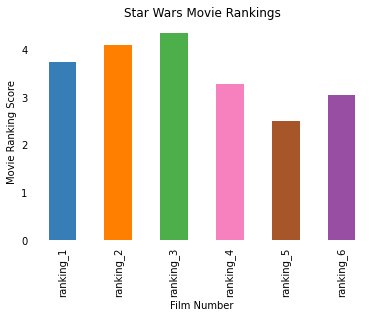

In [27]:
%matplotlib inline
fig, ax = plt.subplots()
star_wars[star_wars.columns[9:15]].mean().plot.bar(color = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3'])

#removes axes and grid markers
plt.tick_params(top = False, left = False, bottom = False, right = False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#sets title for graph and axes
plt.title('Star Wars Movie Rankings')
plt.ylabel('Movie Ranking Score')
plt.xlabel('Film Number')

plt.show()

The movie that respondents chose as their favorite movie on average was *Episode V The Empire Strikes Back*, followed by *Episode VI Return of the Jedi* with *Epsidode IV A New Hope* being not much farther behind.  The prequel movies all have worse ratings than the original trilogy with *Episode I The Phantom Menace*  being followed by *Epsidoe II Attack of The Clones* and finally the lowest rated movie was *Episode III Revenge of the Sith*.  If the majority of the respondents were born in the 80s or before these ratings make sense as it is possible there is a nostalgia factor for the older films of the series getting a higher rating.  

# Movies Seen Analysis

In [28]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

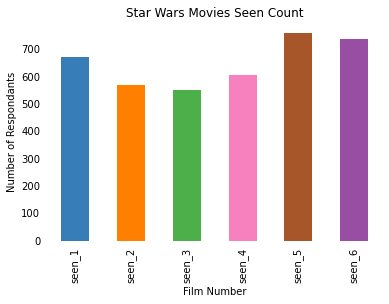

In [29]:
fig, ax = plt.subplots()
star_wars[star_wars.columns[3:9]].sum().plot.bar(color = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3'])

#removes axes and grid markers
plt.tick_params(top = False, left = False, bottom = False, right = False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#sets title for graph and axes
plt.title('Star Wars Movies Seen Count')
plt.xlabel('Film Number')
plt.ylabel('Number of Respondants')

plt.show()


The Most seen movie, *Episode V The Empire Strikes Back* was also the movie that respondents picked as the best movie on average.  This however does not follow for the rest of the movies.  The second most watched movie was *Episode VI Return of the Jedi* which was the third favorite movie of the respondents.  The Third most watched film was *Episode I The Phantom Menace*.  It makes sense that this film was watched by many as there was well over a decade between *Episode VI* coming out and *Episode I* coming out and star wars fans were excited for a new film after so long.  It is surprising to me that *Episode IV A New Hope* was viewed the fourth most of all films as it is the first film of series and was barely outranked in the favorite movie metric by *Episode VI*.  It does not surprise me that the second least watched film and the least watched films are *Episode II Attack of the Clones* and *Episode III Revenge of the Sith* respectively.  Since *Episode I The Phantom Menace* did not recieve a high rating despite having a large amount of views it may have killed interest in the following prequel films for some star wars fans.  

# Star Wars Fans
We will now analyze our data for different segments of respondents.  We will group our respondents by their answer to the question: Do you consider yourself to be a fan of the Star Wars film franchise?  One group will be the self identified fans the other will be the respondents who are not fans.  We will see  how these segments view the movies compared to the population as a whole.  

In [30]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

It is important to note that in this analysis there are 350 respondents that did not answer this question.  We will assume they do not consider themselves fans of the film franchise.  

In [31]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].fillna(False) == True]
non_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].fillna(False) == False]

# Movie Rankings By Fans

In [32]:
#movie rankings by fans
fans[star_wars.columns[9:15]].mean()

ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
ranking_4    2.932971
ranking_5    2.333333
ranking_6    2.829710
dtype: float64

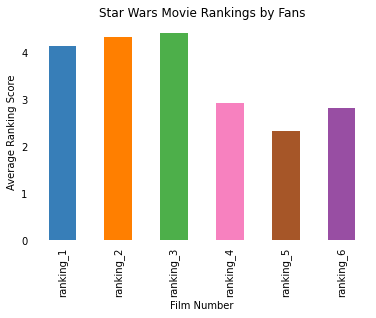

In [33]:
fig, ax = plt.subplots()
#plots in colors that is more easily distinguishable for colorblind people
fans[star_wars.columns[9:15]].mean().plot.bar(color = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3'])
#disable ticks on the plot
plt.tick_params(top = False, bottom = False, right = False, left = False)
#disables axis spines
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#sets titles for graphs and axes
plt.title('Star Wars Movie Rankings by Fans')
plt.ylabel('Average Ranking Score')
plt.xlabel('Film Number')

plt.show()

The Rankings by star wars fans follow the same order as the population as a whole they are 5,6,4,1,2,3.  However the score values are different with the Original Trilogy films having a much higher score than the prequel films .  The lowest rated Original trilogy film had a rating of 2.9 and the highest rated prequel film had a rating of 4.1 this is a difference of 1.2.  The Lowest rated original trilogy film for the population as a whole was 3.3 with the highest rating of the prequel films having an average rating of 3.7.  This is a gap of 0.4.  It seems like the self identified star wars fans have a much larger preference to the original trilogy than to the prequel films.  

# Movies Seen By Fans

In [34]:
fans[star_wars.columns[3:9]].sum()

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64

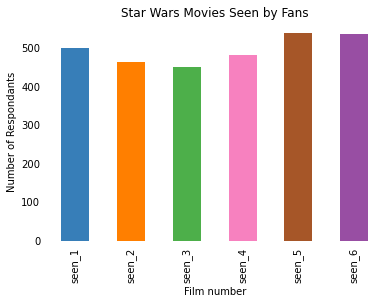

In [35]:
fig, ax = plt.subplots()
fans[star_wars.columns[3:9]].sum().plot.bar(color = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3'])

#removes axes outline and grid from graph
plt.tick_params(top = False, bottom = False, right = False, left = False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#sets titles for axes and graph
plt.title('Star Wars Movies Seen by Fans')
plt.ylabel('Number of Respondants')
plt.xlabel('Film number')

plt.show()

Once again our order of highest to lowest in this metric is the same as the population as a whole.  They are 5,6,1,4,2,3.  The variance between the films watched for the fans is not as great as the population as a whole.  This makes sense because a fan would watch more movies than non fans and be much less likely to skip watchinga film from the franchise.  

# Movie Rankings by Non Fans

In [36]:
non_fans[star_wars.columns[9:15]].mean()

ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64

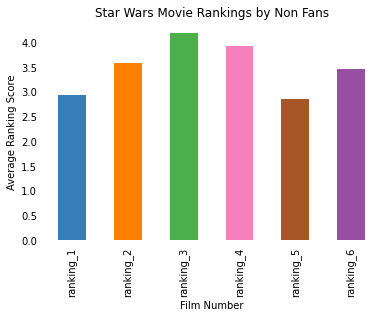

In [37]:
fig, ax = plt.subplots()
non_fans[star_wars.columns[9:15]].mean().plot.bar(color = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3'])

#removes axes and grid from graph
plt.tick_params(top = False, bottom = False, right = False, left = False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#Titles for graph and axes
plt.title('Star Wars Movie Rankings by Non Fans')
plt.xlabel('Film Number')
plt.ylabel('Average Ranking Score')

plt.show()

This data is very different compared to the population as a whole and the star wars fans.  *Episode V The Empire Strikes Back* is still the chosen favorite on average.  However the next highest rated film is *Episode I The Phantom Menace* with a score that is just barely worse than Episode V.  The next highest rated film is *Episode VI Return of the Jedi* with once again a small diference between the next highest rated film *Episode II Attack of the Clones*.  The next highest rated film is *Episode IV A New Hope* followed by the lowest rated film *Episode III Revenge of the Sith*.  The non fans seem to not have a bias towards the original triology compared to the prequels like the self identified fans do, but it is now clear that the highest rated movie by both fans and non fans alike is *Episode V The Empire Strikes Back*

# Movies Seen by Non Fans

In [38]:
non_fans[star_wars.columns[3:9]].sum()

seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64

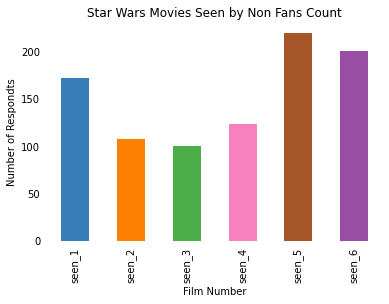

In [39]:
fig, ax = plt.subplots()
non_fans[star_wars.columns[3:9]].sum().plot.bar(color = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3'])
#removes lines and axes from graph
plt.tick_params(top = False, bottom = False, right = False, left = False)

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#sets titles for graph
ax.set_title('Star Wars Movies Seen by Non Fans Count')
plt.xlabel('Film Number')
plt.ylabel('Number of Respondts')

plt.show()

The order of the films by most watched to least watched is the same for the population as a whole, fans, and non fans.  That order is 5,6,1,4,2,3.  The drop off between *Episode I The Phantom Menace* and *Episode IV A New Hope* is very large.  It makes sense for there to be a large variance between films being seen for non fans as they are less likely to watch all of them if they are not fans of the film franchise.  I am not surprised once again that of the prequel films the *Episode I The Phantom Menace* was the most watched film as it was the first star wars film in over a decade and had a lot of hype behind it.  